# A Kernel Test of Goodness of Fit
## *Team Project on the course “Principles of Applied Statistics”*
by Viktoriia Zinkovich, Kamil Garifullin, Maksim Osipenko

In this paper we have tried to realise and reproduce the results of the article "A Kernel Test of Goodness of Fit" by Kacper Chwialkowski, Heiko Strathmann, and Arthur Gretton.

<br>

## Problem Statement

The main idea of this article is to **derive a statistical test**, both for i.i.d. and non-i.i.d. samples, which would help to determine for given a set of samples $\{Z_i\}^n_{i=1}$ with distribution $Z_i \sim q$, **whether q matches some reference or target distribution p**. Actually, this problem was already partially solved by Gorham & Mackey (2015), but their approach is problematic to apply since it has the following drawbacks:

<br>

1. The function class used is really **complicated**, so to obtain a sample quality measure, one should solve a non-trivial linear program

2. Due to the complexity of the function class used, it is **not clear** how one would **compute p-values** for this statistic


So since the problems above exists, it was necessary to make a new test, which is the subject of this article.

<br>


## Methods

*In this chapter, we will not show where every formula in the paper came from, but we will give what we thought were the most important results for understanding what is going on in the paper.*

<br>

The key idea of this article is to define a statistical
test of goodness-of-fit, based on a Stein discrepancy computed in a **Reproducing Kernel Hilbert Space (RKHS)**. In this space many intresting useful results appear, which makes our life better (in terms of computing statistical tests)! Specifically, our goal is to write the **maximum discrepancy** between target distribution $p$ and observed sample distribution $q$ in a RKHS.

Let's denote by $\mathcal{F}$ $-$ the RKHS of functions on $\mathbb{R}^d$ with reproducing kernel $k$, and by $\mathcal{F}^d$ $-$ the product RKHS consisting of elements $f:=\left(f_1, \ldots, f_d\right)$ with the standard inner product:

<br>

 $$
 \langle f, g\rangle_{\mathcal{F}^d}= \sum_{i=1}^d\left\langle f_i, g_i\right\rangle_{\mathcal{F}}
 $$

<br>

Also, we will define a Stein operator $T$ acting on $f \in \mathcal{F}^d$:

<br>

  $$
  T_p f:=\sum_{i=1}^d\left(\frac{\partial \log p(x)}{\partial x_i} f_i(x)+\frac{\partial f_i(x)}{\partial x_i}\right)
  $$

<br>

Suppose a random variable $Z \sim q$ and $X \sim p$. It can be shown, that the Stein operator can be expressed by defining a function that depends on gradients of the logdensity and the kernel:

<br>

$$
\mathbb{E} T_p f(Z)=\left\langle f, \mathbb{E} \xi_p(Z)\right\rangle_{\mathcal{F}^d}=\sum_{i=1}^d\left\langle f_i, \mathbb{E} \xi_{p, i}(Z)\right\rangle_{\mathcal{F}}
$$

where,

$$
\xi_p(x, \cdot):=[\nabla \log p(x) k(x, \cdot)+\nabla k(x, \cdot)]
$$

<br>

Also, using integration by parts it can be seen for $X$ from the target measure that $\mathbb{E}\left(T_p f\right)(X)=0$ which allows to express Stein discrepancy as:

<br>

$$
\begin{aligned}
S_p(Z) & :=\sup _{\|f\|<1} \mathbb{E}\left(T_p f\right)(Z)-\mathbb{E}\left(T_p f\right)(X) \\
& =\sup _{\|f\|<1} \mathbb{E}\left(T_p f\right)(Z) \\
& =\sup _{\|f\|<1}\left\langle f, \mathbb{E} \xi_p(Z)\right\rangle_{\mathcal{F}^d} \\
& =\left\|\mathbb{E} \xi_p(Z)\right\|_{\mathcal{F}^d},
\end{aligned}
$$

<br>

Finally, to obtain a key result of the article, we need two theorems that we will cite here without proof:

<br>

**Theorem 1.**
<blockquote>
If $E h_p(Z, Z)<\infty$, then $S_p(Z)^2=$ $\left\|\mathbb{E} \xi_p(Z)\right\|_{\mathcal{F}^d}=\mathbb{E} h_p\left(Z, Z^{\prime}\right)$
</blockquote>

<br>

**Theorem 2.**
<blockquote>
Let $q, p$ be probability measures and $Z \sim q$. if some conditions concerning finiteness of the expectation matrix are fulfilled, then $S_p(Z)=0$ if and only if $p=q$.
</blockquote>

<br>

These expressions also introduce the function $h_p(Z, Z^{\prime})$, which can be represented as the sum of several summands depending on the kernel density function and its derivatives:

<br>

$$
\begin{aligned}
h_p(x, y):= & \nabla \log p(x)^{\top} \nabla \log p(y) k(x, y) \\
& +\nabla \log p(y)^{\top} \nabla_x k(x, y) \\
& +\nabla \log p(x)^{\top} \nabla_y k(x, y) \\
& +\left\langle\nabla_x k(x, \cdot), \nabla_y k(\cdot, y)\right\rangle_{\mathcal{F}^d}
\end{aligned}
$$

<br>

**Finally**, it follows from these two theorems that the Stein discrepancy can serve as an indicator of the similarity of the distributions of $p$ and $q$! And now our task is to find out when $S_p(Z) = 0$ according to Theorem 2.

<br>

$$
\boxed{
\text{when holds} \quad S_p(Z)= \mathbb{E} h_p\left(Z, Z^{\prime}\right) = 0  \quad \text{?}
}
$$

<br>

This will be discussed in more detail in the chapter below on Experiment 1.

<br>

---

## Numerical Experiments

### General Imports

In [40]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas import DataFrame

sns.set_style("whitegrid")

In [42]:
!git clone https://github.com/karlnapf/kernel_goodness_of_fit.git

Cloning into 'kernel_goodness_of_fit'...
remote: Enumerating objects: 90, done.
remote: Total 90 (delta 0), reused 0 (delta 0), pack-reused 90
Receiving objects: 100% (90/90), 120.35 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [43]:
%cd kernel_goodness_of_fit

/content/kernel_goodness_of_fit/kernel_goodness_of_fit


In [44]:
!ls

2dimNormal  density_estimation	LICENSE		 README.md  sgld_test  thinning  tstudent
binomodal   goodness_of_fit	model_criticism  samplers   stat_test  tools


<br>

## Experiment #1: Student's T vs Normal

*This example is all about choosing of parameter $a_n$ to create proper wild bootstrap iterations. We wrote appropriate comments and tried to realise all the code.*

<br>

First, let's recall that we need to investigate when $S_p(Z)= \mathbb{E} h_p\left(Z, Z^{\prime}\right) = 0$. Let's consider the example when we want to know if our distribution comes from standart normal, which can be written as follows:

<br>

$$
H_0: Z \sim \mathcal{N}(0, 1) \quad \text{vs} \quad H_1: Z \not\sim \mathcal{N}(0, 1)
$$

<br>

Then, let's first create **samples from Student's t-distribution** with different values of degrees of freedom. It is clear that if our model works correctly, we expect to see small p-values (i.e. reject the hypothesis, Student's distribution is not normal when $\nu$ is small), and when $\nu \rightarrow \infty$ want to see a large p-value, since Student's t-distribution will tend towards normal.

<br>

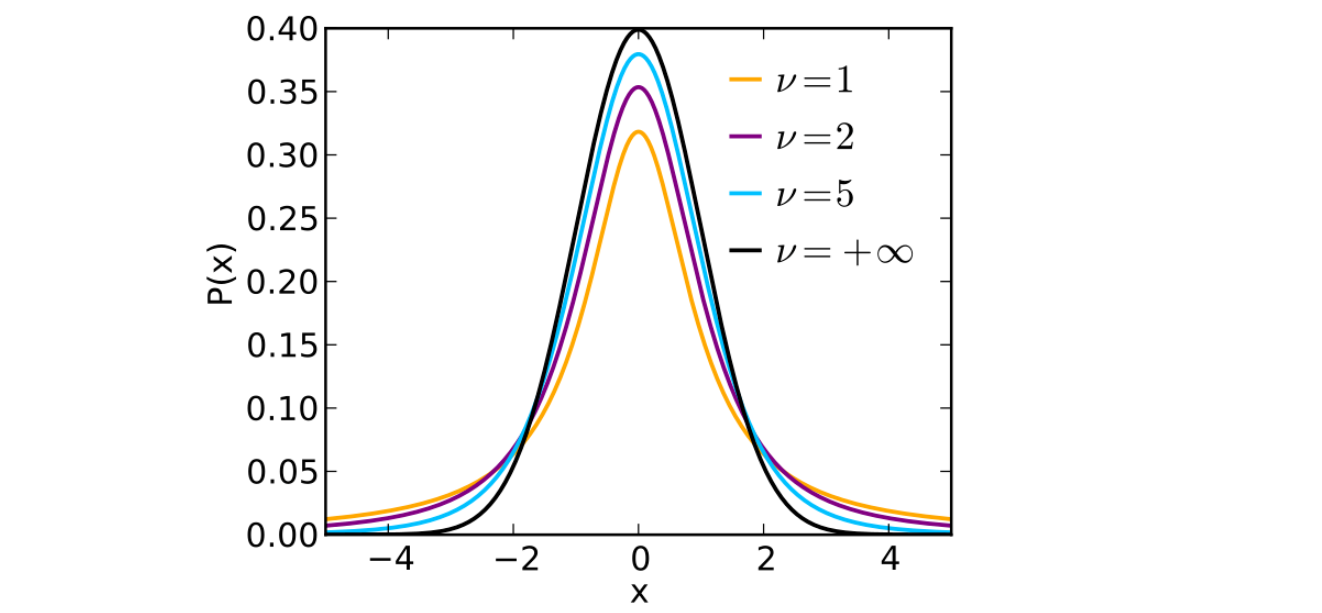


Then, let us consider generating a sample from the **Student's t-distribution** using Markov chain Monte Carlo. Specifically, **the Metropolis-Hasting algorithm**:

<br>

1. we start with a random state,
2. we randomly select a new state based on the offer probability (g),
3. we calculate the probability of acceptance (A) of the proposed new state,
4. we flip a coin with the probability of the coin falling heads equal to the probability of acceptance, if the coin falls heads, we accept the sample, otherwise we reject it,
5. repeat the process for some time.

In [45]:
from statsmodels.tsa.stattools import acf
from scipy.stats import t as t_distribution

from stat_test.linear_time import GaussianSteinTest
from stat_test.quadratic_time import GaussianQuadraticTest
from samplers.MetropolisHastings import metropolis_hastings

Some special variation of the MCMC algorithm was given in the article for some reason, so we decided to write our own as well to compare whether we understood the article correctly or not, and it is worth noting:


*   `df` = degree of freedom
*   `epsilon` =  controlling the step size in the random walk
*   Markov chain Monte Carlo (with Random walk) used to generate sample from a probability distribution


In [46]:
# our function
def metropolis_hastings_t_student(N, df, epsilon):
    samples = np.zeros(N)
    xt = 0
    for t in range(N):
        x_prime = xt + np.sqrt(epsilon) * np.random.randn()
        alpha = t_distribution.pdf(x_prime, df) / t_distribution.pdf(xt, df)
        if np.random.rand() < alpha:
            xt = x_prime
        samples[t] = xt
    return samples


# function from the article
def almost_t_student(N, df, epsilon):
    samples = np.zeros(N)
    xt = 0
    for t in range(N):
        delta = epsilon/2 * (-(1 + df) * xt / (df + xt**2)) + np.sqrt(epsilon) * np.random.randn()
        xt = xt + delta
        samples[t] = xt
    return samples

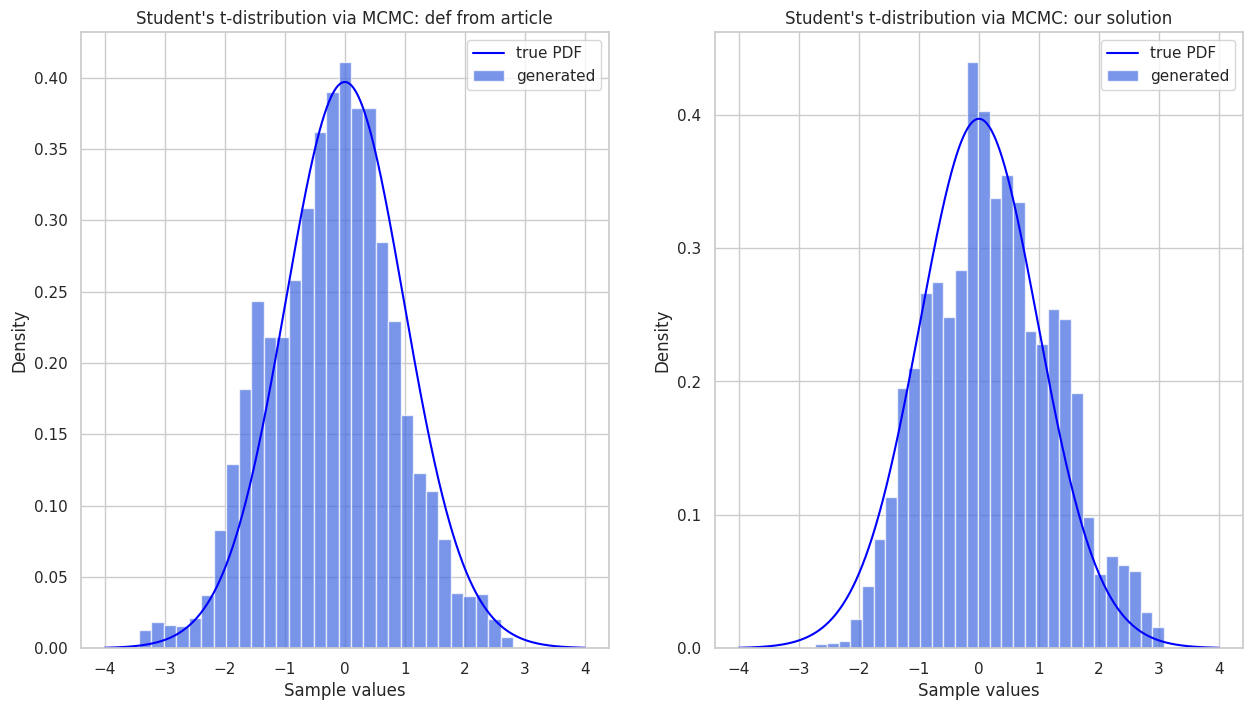

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

N = 10000
x_values = np.linspace(-4, 4, N)
pdf_true = t_distribution.pdf(x_values, df=50.0)
ax1.plot(x_values, pdf_true, label='true PDF', color='blue')
X = almost_t_student(N, 50.0, 0.01)
ax1.hist(X, bins=30, density=True, color='royalblue', alpha=0.7, label='generated')
ax1.set_xlabel('Sample values')
ax1.set_ylabel('Density')
ax1.set_title("Student's t-distribution via MCMC: def from article")
ax1.legend()

ax2.plot(x_values, pdf_true, label='true PDF', color='blue')
X = metropolis_hastings_t_student(N, 50.0, 0.01)
ax2.hist(X, bins=30, density=True, color='royalblue', alpha=0.7, label='generated')
ax2.set_xlabel('Sample values')
ax2.set_ylabel('Density')
ax2.set_title("Student's t-distribution via MCMC: our solution")
ax2.legend()

plt.show()

Now let's calculate the p-value for samples from Student's t-distribution with **different degrees of freedom**. To do this, after generating the sample, we will calculate the following V-statistics:

<br>

$$
V_n=\frac{1}{n^2} \sum_{i, j=1}^n h\left(Z_i, Z_j\right)
$$

<br>

However, care has to be taken when the $Z_i$ can be **correlated**. The wild bootstrap technique addresses both problems, modifying the bootstrap procedure. It accounts for correlation structure in the $Z_i$ by mimicking it with an auxiliary random process: a Markov chain taking values in $\{-1,1\}$, starting from $W_{1, n}=1$:

<br>

$$
W_{t, n}=\mathbf{1}\left(U_t>a_n\right) W_{t-1, n}-\mathbf{1}\left(U_t<a_n\right) W_{t-1, n}
$$

<br>

where the $U_t$ are uniform i.i.d. random variables and $a_n$ is the probability of $W_{t, n}$ changing sign$. This leads to a bootstrapped V-statistic:

<br>

$$
B_n=\frac{1}{n^2} \sum_{i, j=1}^n W_{i,n} W_{j,n} h\left(Z_i, Z_j\right)
$$

<br>

Moreover, under the null hypothesis, $nB_n$ is a good approximation of $nV_n$, so it is possible to approximate quantiles of the null distribution by sampling
from it. So the following test procedure for testing the null
hypothesis that the $Z_i$ are distributed according to the target
distribution $p$ is proposed:

<br>

1. Calculate the test statistic $V_n$.
2. Obtain wild bootstrap samples $\{B_n\}^{D}_{i=1}$ and estimate the $1-\alpha$ empirical quantile of these samples
3. If $V_n$ exceeds the quantile, reject hypothesis


Also in this experiment, in addition to demonstrating the test creation process itself, we want to pick up the various parameters $a_n$ that appear in the expression for the Markov chain. Let us plot the p_values from degrees of freedom for different values of $a_n$.

### $a_n = 0.5$

We first investigate $a_n = 0.5$. Such a value corresponds to a "random" change in the sign of $W_{t,n}$ (50/50), and thus corresponds to the case of i.i.d variables.

<br>

$$
W_{t, n}=\mathbf{1}\left(U_t>0.5\right) W_{t-1, n}-\mathbf{1}\left(U_t<0.5\right) W_{t-1, n}
$$


In [48]:
def grad_log_normal(x):
    return -x

In [49]:
N = 500  # change this number so to correspond to the article
dfs = [1, 5, 10] # different degrees of freedom
mc_reps = 100
res = np.empty((0, 2))

block = N/np.log(N)
p_change  = 1.0/block


for df in dfs:
    print(f'ready for df={df}')
    for mc in range(mc_reps):
        X = almost_t_student(10*N, df, 0.01) # generate student's t-distribution
        X = X[::10]
        me = GaussianQuadraticTest(grad_log_normal) # grad_log_normal - a_n = 0.5 (scaling=2), Gaussian kernel is chosen
        U_stat, _ = me.get_statistic_multiple(X) # calculate V-statistics (quadratic form)
        # constructing a sample using Bootstrap
        # generate random process W, compute bootstrap statistics, estimate p-value
        pval = me.compute_pvalues_for_processes(U_stat, p_change)
        res = np.vstack((res,np.array([int(df), pval])))

# Same process but for "infinite" sample, df=100
for mc in range(mc_reps):
    X = almost_t_student(10*N, 100, 0.01)
    X = X[::10]
    me = GaussianQuadraticTest(grad_log_normal)
    U_stat, _ = me.get_statistic_multiple(X)
    pval = me.compute_pvalues_for_processes(U_stat,p_change)
    res = np.vstack((res,np.array([np.Inf, pval])))

ready for df=1
ready for df=5
ready for df=10


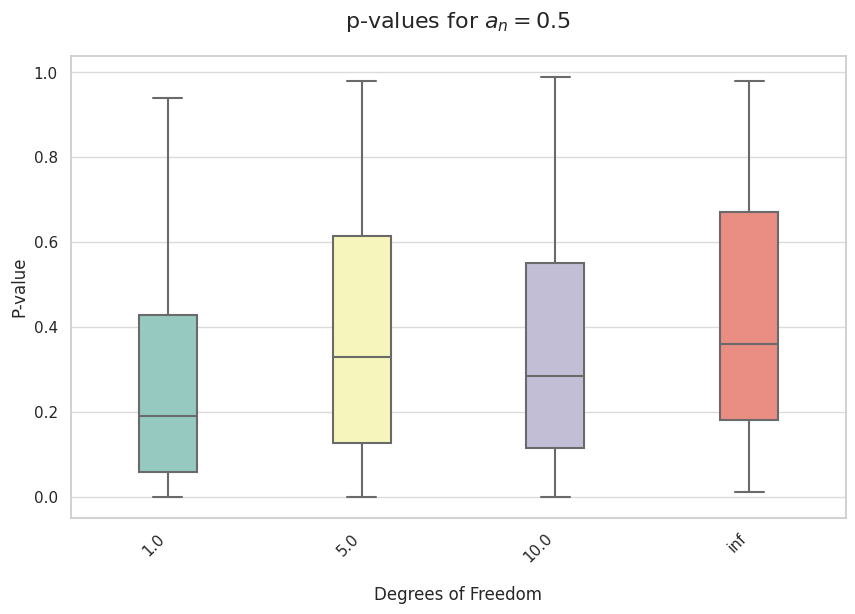

In [50]:
df = pd.DataFrame(res)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[0], y=df[1], palette="Set3", width=0.3)
plt.xlabel('Degrees of Freedom', labelpad=15)
plt.ylabel('P-value')
plt.title(r'p-values for $a_n = 0.5$')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title(r'p-values for $a_n = 0.5$', pad=20, fontsize=16)
plt.show()

It can be seen that the p-value distribution does not correspond to what was originally assumed, so this $a_n$ is not suitable (originally we wanted p-values to be small for small degrees of freedom, but for $\nu \rightarrow \infty$ we expect a large value on the contrary).

### $a_n = 0.02$

Next, we take the value $a_n = 0.02$.

In [51]:
N = 500
dfs = [1, 5, 10] # different degrees of freedom
mc_reps = 100
res = np.empty((0, 2))

block = N/np.log(N)
p_change  = 1.0/block


for df in dfs:
    print(f'ready for df={df}')
    for mc in range(mc_reps):
        X = almost_t_student(10*N, df, 0.01)
        X = X[::10]
        me = GaussianQuadraticTest(grad_log_normal, scaling=50) # a_n = 0.02
        U_stat, _ = me.get_statistic_multiple(X)
        # constructing a sample using Bootstrap
        # generate random process W, compute bootstrap statistics, estimate p-value
        pval = me.compute_pvalues_for_processes(U_stat, p_change)
        res = np.vstack((res,np.array([int(df), pval])))

# Same process but for "infinite" sample, df=100
for mc in range(mc_reps):
    X = almost_t_student(10*N, 100, 0.01)
    X = X[::10]
    me = GaussianQuadraticTest(grad_log_normal)
    U_stat, _ = me.get_statistic_multiple(X)
    pval = me.compute_pvalues_for_processes(U_stat,p_change)
    res = np.vstack((res,np.array([np.Inf, pval])))

ready for df=1
ready for df=5
ready for df=10


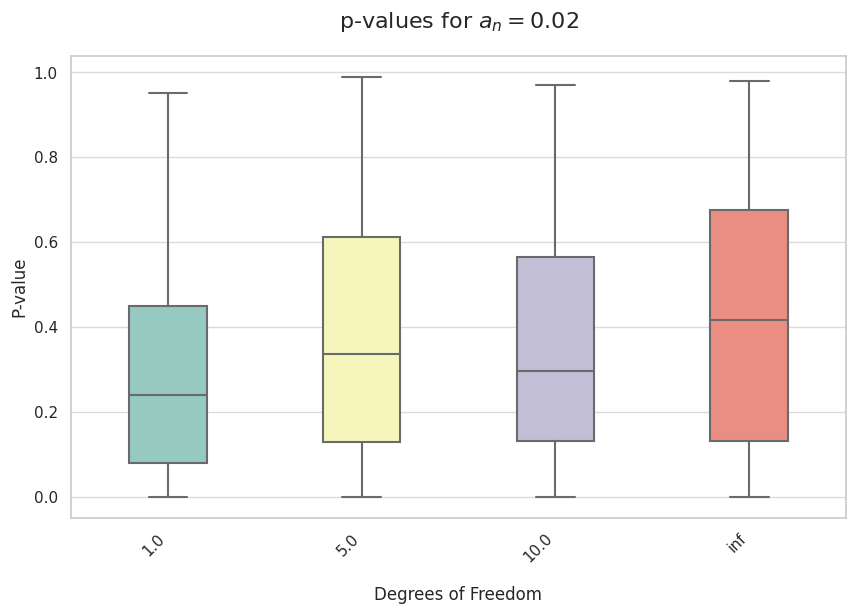

In [52]:
df = pd.DataFrame(res)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[0], y=df[1], palette="Set3", width=0.4)
plt.xlabel('Degrees of Freedom', labelpad=15)
plt.ylabel('P-value')
plt.title(r'p-values for $a_n = 0.02$')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title(r'p-values for $a_n = 0.02$', pad=20, fontsize=16)
plt.show()

Here the situation is better, but at such a small value of $a_n$ the values become quite correlated (since the probability of one kind of sign is much higher) and this way is not suitable for us either.

## $a_n = 0.1$ (mixture of thinning and adjusting $a_n$)

Let's try a different tactic to get better results. The solution is to thinning and adjusting $a_n$. Specifically, choose $a_n$ only from certain steps (so that variables become less correlated) and set $a_n = 0.1$, thus preserving good statistical power.

In [53]:
m = 2
N = 700 * m

dfs = range(1, 10, 2)
mc_reps = 200
res = np.empty((0, 2))

for df in dfs:
    for mc in range(mc_reps):
        X = np.random.standard_t(df, N)
        me = GaussianSteinTest(grad_log_normal, m)
        pvalue = me.compute_pvalue(X)
        res = np.vstack((res, np.array([df, pvalue])))

# "infinite" sample
for mc in range(mc_reps):
    X = np.random.randn(N) # standard normal distribution
    me = GaussianSteinTest(grad_log_normal,m)
    pvalue = me.compute_pvalue(X)
    res = np.vstack((res,np.array([np.Inf, pvalue])))

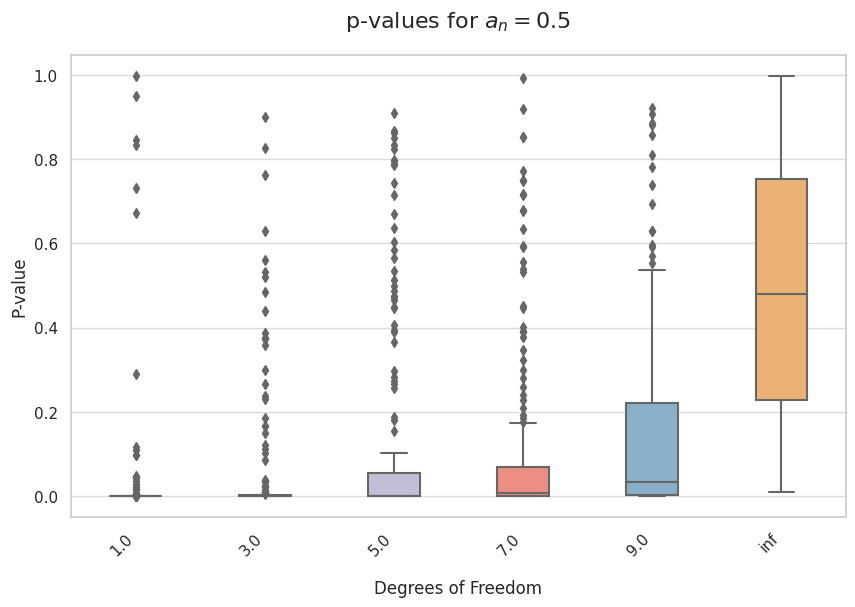

In [54]:
df = pd.DataFrame(res)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[0], y=df[1], palette="Set3", width=0.4)
plt.xlabel('Degrees of Freedom', labelpad=15)
plt.ylabel('P-value')
plt.title(r'p-values for $a_n = 0.5$')
plt.grid(axis='y', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title(r'p-values for $a_n = 0.5$', pad=20, fontsize=16)
plt.show()

<br>

## Experiment #2: Statistical model criticism on gaussian processes



In [55]:
!pip install GPy

In [56]:
from GPy.kern import RBF
from GPy.models.gp_regression import GPRegression
from scipy.io.matlab.mio import loadmat

In [57]:
def prepare_dataset(X, y):
    N = len(X)
    train_test_ind = int(0.9 * N)

    inds = np.random.permutation(N)
    X = X[inds]
    y = y[inds]

    # spit into train and test
    X_test = X[train_test_ind:]
    y_test = y[train_test_ind:]
    X_train = X[:train_test_ind]
    y_train = y[:train_test_ind]
    N = len(X_train)
    N_test = len(X_test)

    # sort for easy plotting
    temp = X_test[:, 0].argsort()
    y_test = y_test[temp]
    X_test = X_test[temp]
    temp = X[:, 0].argsort()
    y = y[temp]
    X = X[temp]

    # normalise by training data statistics
    X_mean = np.mean(X_train)
    X_std = np.std(X_train)
    X_train -= X_mean
    X_train /= X_std
    X_test -= X_mean
    X_test /= X_std

    y_mean = np.mean(y_train)
    y_std = np.std(y_train)
    y_train -= y_mean
    y_train /= y_std
    y_test -= y_mean
    y_test /= y_std

    return X_train, y_train, X_test, y_test, N, N_test

def bootstrap_null(U_matrix, num_bootstrap=1000): # bootstrap, return nB_n
    bootstrapped_stats = np.empty(num_bootstrap)
    N = U_matrix.shape[0]

    for i in range(num_bootstrap):
        W = np.sign(np.random.randn(N)) #W_t,n - coeff in random walk
        WW = np.outer(W, W)  # W_{i,n}*W{j,n}
        st = np.mean(U_matrix * WW) # st = 1/n^2*sum(WW*U_matr) = 1/n^2*sum(W_{i,n}*W{j,n}*h(Z_i,Z_j))
        bootstrapped_stats[i] = N * st # bootstrapped_stats = nB_n =  1/n*sum(W_{i,n}*W{j,n}*h(Z_i,Z_j))

    return bootstrapped_stats #nB_n

def compute_gp_regression_gradients(y_test, pred_mean, pred_std):
    return -(y_test - pred_mean) / pred_std ** 2

num_train: 361
num_test: 41


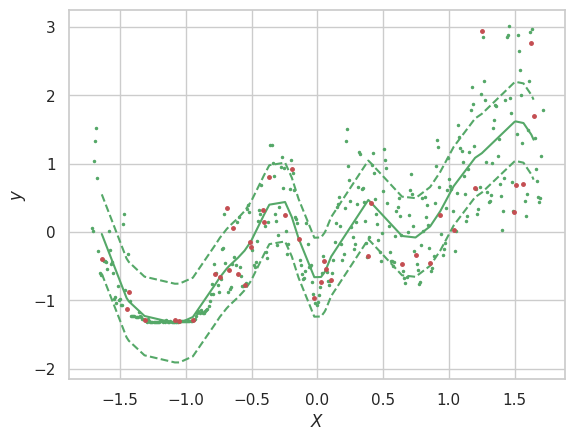

 <ipython-input-58-b647fc02ea3f>:34: UserWarning:

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



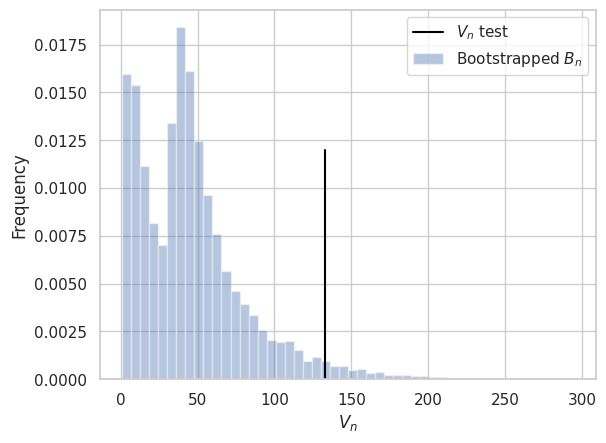

In [58]:
data = loadmat("/content/02-solar.mat")
X = data['X']
y = data['y']

X_train, y_train, X_test, y_test, N, N_test = prepare_dataset(X, y) #скэйлинг и деление данных на трэйн и тест

print ("num_train:", len(X_train))
print ("num_test:", len(X_test))

kernel = RBF(input_dim=1, variance=1., lengthscale=1.)# зададим гаусовское ядро для GPR
m = GPRegression(X_train, y_train, kernel)# модель для GPR
m.optimize()

res = 100
pred_mean, pred_std = m.predict(X_test) # предсказание на тестовых данных
plt.plot(X_test, pred_mean, 'g-') #plot полученную xthtp GPR кривую
plt.plot(X_test, pred_mean + 2 * pred_std, 'g--')# построить верхнюю грань дов интервала
plt.plot(X_test, pred_mean - 2 * pred_std, 'g--')#  построить верхнюю грань дов интервала
plt.plot(X_train, y_train, 'g.', markersize=3) # трэйн точки
plt.plot(X_test, y_test, 'r.', markersize=5) # тестовые точки
plt.grid(True)
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.savefig("gp_regression_data_fit.eps", bbox_inches='tight')
plt.show()

s = GaussianQuadraticTest(None) # инициализируем тест
gradients = compute_gp_regression_gradients(y_test, pred_mean, pred_std)
U_matrix, stat = s.get_statistic_multiple_custom_gradient(y_test[:, 0], gradients[:, 0])#расчет статистики для разных сэмплов
# stat = nV_n, U_matrix = matrix h: nV_n = 1/n * sum(h(Z_i,Z_j))
num_test_samples = 10000
null_samples = bootstrap_null(U_matrix, num_bootstrap=num_test_samples) # returns nB_n
# lets plot bootstrapped B_n distribution
sns.distplot(null_samples, kde=False, norm_hist=True)
# lets plot test statistics
plt.plot([stat, stat], [0, .012], 'black')
plt.legend([r"$V_n$ test", r"Bootstrapped $B_n$"])
plt.xlabel(r"$V_n$")
plt.ylabel(r"Frequency")
plt.savefig("gp_regression_bootstrap_hist.eps", bbox_inches='tight')

plt.show()

1. The second experiment is devoted to **statistical model criticism on gaussian processes**.

Some words about GPR: Gaussian Process (GP) regression is a non-parametric Bayesian approach used for regression tasks. It models the relationship between input variables and output values as a distribution over functions.
There is an example of GPR on toy dataset:

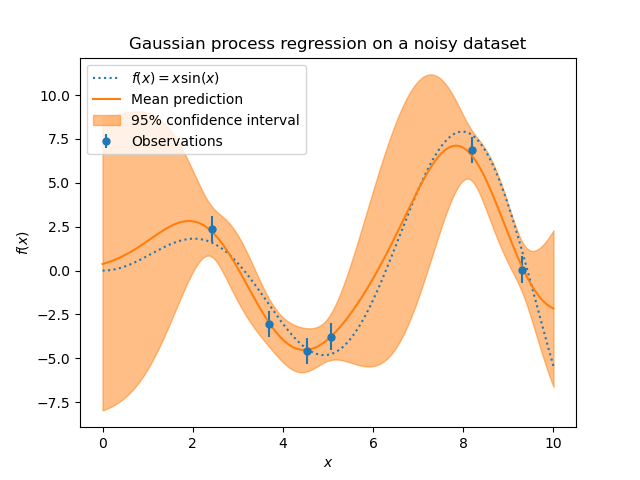

2. Now lets talk about our **second example**. We had solar dataset. It consists of $N = 402$ sample. It is a dataset for 1D regression. So the dataset has a target variable and 1 covariant. We want to make statistic test with the null hypothesis that the solar data set was generated based on the predicted on train data distribution with the usage of GPR.  So, we fit train data($N_{train} = 361$) using a GP with a squared exponential kernel and a Gaussian noise model:

$$k(x,x') = \sigma^2exp(-\frac{||x- x'||^2}{2l^2})$$

$H_0:$ solar dataset $  \sim $ predictive distribution

3. So after training GPR we can obtain this graph:

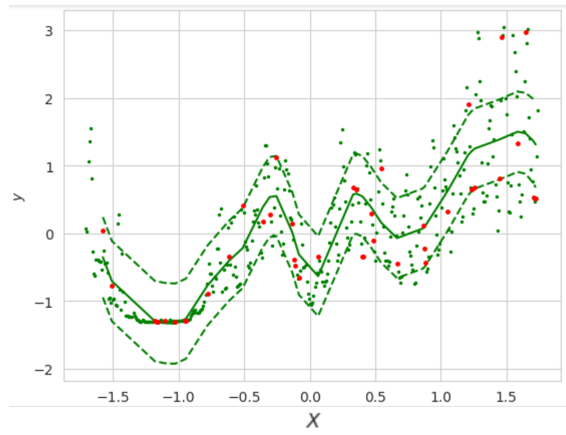


This Figure shows training and testing data, and the fitted GPR curve.

Green dots in the graph represent  train dataset.
Red dots are test dataset.

Green line is GPR predicted line.

Dotted green lines are left and right edges of confidence interval.

It is seen that Gaussian noise model is a poor fit for this particular dataset, for example around $X = −1$.


4. Then we can we estimate the
null distribution quantiles using a **wild bootstrap**
procedure(bootstrap_null function in the code). After that we obtain figure:
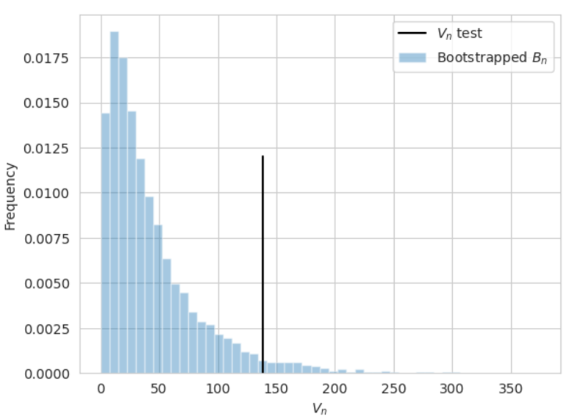

This figure shows the distribution over ten thousand bootstrapped V-statistics $B_n$ with $n = N_{test}$. The test statistic lies in an upper quantile of the bootstrapped null distribution $→$ **it is unlikely that the test points were generated by the fitted GP model**.

<br>

## Experiment #3: Convergence in non-parametric density estimation


In [59]:
!pip install git+https://github.com/karlnapf/kernel_exp_family.git

  Cloning https://github.com/karlnapf/kernel_exp_family.git to /tmp/pip-req-build-5no44kg_
  Running command git clone --filter=blob:none --quiet https://github.com/karlnapf/kernel_exp_family.git /tmp/pip-req-build-5no44kg_
  Resolved https://github.com/karlnapf/kernel_exp_family.git to commit 2224eb3d2c1478a24ef17acab2a5fb503bdec70b
  Preparing metadata (setup.py) ... done


In [ ]:
# !pip install cholupdates

In [61]:
import os
from matplotlib import markers
from kernel_exp_family.estimators.lite.gaussian import KernelExpLiteGaussian
#from tools.tools import store_results
#from tools.latex_plot_init import plt
#from density_estimation import gaussian

# The infinite dimensional exponential family

Our implementation of the model assumes the log density to take the form $f(x)$, where $f$ lies in an RKHS induced by a Gaussian kernel with bandwidth 1. We fit the model using $N$ observations drawn from a standard Gaussian, and performed our quadratic time test on a separate evaluation dataset of fixed size, $N_{test} = 500$. We want to identify $N$ sufficiently large that the goodness of fit test did not reject the null hypothesis (i.e., the model had learned the density sufficiently well, bearning in mind that it is guaranteed to converge for sufficiently large $N$).

**Important note**: for that code to work it is necessary to install `cholupdates==0.0.1a7` and change the name of a callable package in the configs when an error is thrown.

In [ ]:
def exp_family(D, N_test, num_bootstrap, sigma, lmbda, num_repetitions):

    Ns_fit = np.array([5, 10, 25, 50, 75, 100, 250, 500, 750, 1000, 2000, 5000])


    grad = lambda x: est.grad(np.array([x]))[0]
    s =  GaussianQuadraticTest(grad)

    result_fname = os.path.splitext(os.path.basename("results"))[0] + ".txt"

    # Getting the data:
    for _ in range(num_repetitions):
        for N in Ns_fit:
            est = KernelExpLiteGaussian(sigma, lmbda, D, N)
            X_test = np.random.randn(N_test, D)

            X = np.random.randn(N, D)
            est.fit(X)

            U_matrix, stat = s.get_statistic_multiple(X_test[:,0])

            # Wild bootstrap:
            bootsraped_stats = np.empty(num_bootstrap)
            for i in range(num_bootstrap):
                W = np.sign(np.random.randn(N_test))
                WW = np.outer(W, W)
                st = np.mean(U_matrix * WW)
                bootsraped_stats[i] = N_test * st

            p_value = np.mean(bootsraped_stats>stat)
            #print (N, p_value)


            # Save obtained results into a file
            store_results(result_fname,
                          D=D,
                          N=N,
                          N_test=N_test,
                          num_bootstrap=num_bootstrap,
                          sigma=sigma,
                          lmbda=lmbda,
                          p_value=p_value
                          )


exp_family(D = 1, N_test = 500, num_bootstrap = 200, sigma = 1, lmbda = 0.01, num_repetitions = 150)

Plotting the figures of the p-values from a toy dataset to reproduce the article. The distribution of the p-values evolve as a function of $N$; this distribution is uniform for $N = 5000$, but at $N = 500$, the null hypothesis would very rarely be rejected.

In [ ]:
fname = "density_estimation\increasing_data_fixed_test.txt"

fields = ['p_value']
field_plot_names = {'p_value': 'p-value', 'N': r'$N$'}


def kwargs_gen(**kwargs):
    return kwargs

def plot_inf_dim(D, N_test, num_bootstrap, sigma, lmbda):
    conditions = kwargs_gen(D=D, N_test=N_test, num_bootstrap=num_bootstrap, sigma=sigma, lmbda=lmbda)

    # x-axis of plot
    x_field = 'N'
    x_field_values = [50, 100, 500, 1000, 2000, 5000]

    df = pd.read_csv(fname, index_col=0)

    for field in fields:
        plt.figure()

        # filter out desired entries
        mask = (df[field] == df[field])
        for k,v in conditions.items():
            mask &= (df[k] == v)
        current = df.loc[mask]

        # only use desired values of x_fields
        current = current.loc[[True if x in x_field_values else False for x in current[x_field]]]

        # use ints on x-axis
        current[x_field] = current[x_field].astype(int)

        sns.set(style="darkgrid")
        sns.boxplot(x=x_field, y=field, data=current.sort_values(x_field), hue=x_field, legend=False, \
                    palette=sns.color_palette("pastel", 6), flierprops={"marker": "d"})

        plt.xlabel(field_plot_names[x_field], fontsize=20)
        plt.ylabel(field_plot_names[field], fontsize=20)

        plt.tick_params(axis='both', which='major', labelsize=16)

        fname_base = os.path.splitext(fname)[0]
        plt.savefig(fname_base + ".png", bbox_inches='tight')
        plt.savefig(fname_base + ".eps", bbox_inches='tight')

        # print info on number of trials
        print(field)
        print("Average number of trials: %d" % int(np.round(current.groupby(x_field).apply(len).mean())))
        print(current.groupby(x_field).apply(len))


    plt.show()


plot_inf_dim(D = 1, N_test = 500, num_bootstrap = 200, sigma = 1, lmbda = 0.01)

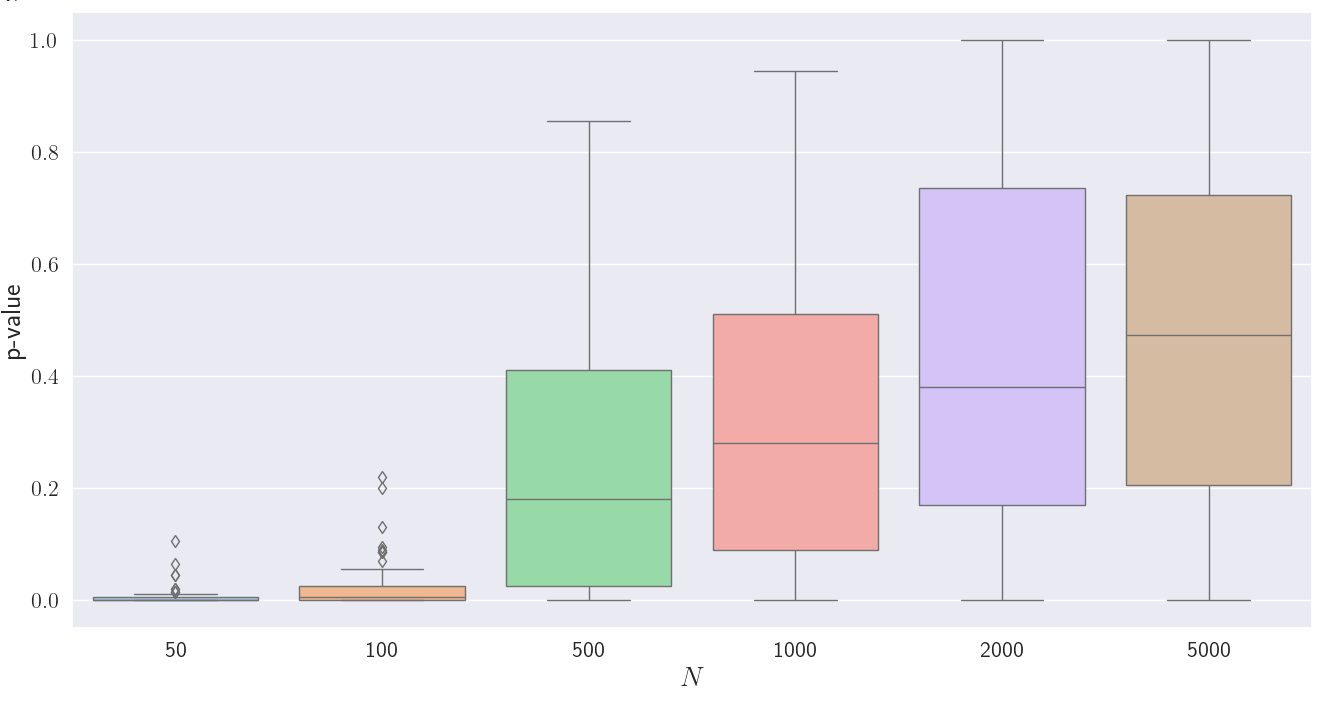

# Approximation via random Fourier features

For that model $f = log(pdf)$, is approximated using a finite dictionary of random Fourier features. The natural question when using this approximation is: “How many random features do it I need?” Using the same test power $N_{test} = 500$ as above, and a large number of available samples $N = 5 · 10^4$.

In [ ]:
def four_feat(D, N_test, N_fit, sigma, lmbda, num_bootstrap, num_repetitions):

    ms_fit = np.array([1, 2, 5, 10, 25, 50, 75, 100, 250, 500, 1000, 2000, 5000])


    grad = lambda x: est.grad(np.array([x]))[0]
    s =  GaussianQuadraticTest(grad)

    result_fname = os.path.splitext(os.path.basename("inc_features"))[0] + ".txt"

    for _ in range(num_repetitions):
        for m in ms_fit:
            est = gaussian.KernelExpFiniteGaussian(sigma, lmbda, m, D)
            X_test = np.random.randn(N_test, D)

            X = np.random.randn(N_fit, D)
            est.fit(X)

            U_matrix, stat = s.get_statistic_multiple(X_test[:,0])

            bootsraped_stats = np.empty(num_bootstrap)
            for i in range(num_bootstrap):
                W = np.sign(np.random.randn(N_test))
                WW = np.outer(W, W)
                st = np.mean(U_matrix * WW)
                bootsraped_stats[i] = N_test * st

            p_value = np.mean(bootsraped_stats>stat)
            #print (m, p_value)

            store_results(result_fname,
                          D=D,
                          N_fit=N_fit,
                          N_test=N_test,
                          m=m,
                          num_bootstrap=num_bootstrap,
                          sigma=sigma,
                          lmbda=lmbda,
                          p_value=p_value
                          )

four_feat(D = 1, N_test = 500, N_fit = 50000, sigma = 1, lmbda = 0.01, num_bootstrap = 200, num_repetitions = 150)

The distributions of p-values for an increasing number of random features $m$.

In [ ]:
fname = "density_estimation\increasing_features_fixed_test.txt"

fields = ['p_value']
field_plot_names = {
                    'p_value': 'p-value',
                    'm': r'$m$'
                    }
def kwargs_gen(**kwargs):
    return kwargs

def four_feat_plot(D, N_test, N_fit, num_bootstrap, sigma, lmbda):
    conditions = kwargs_gen(D = D, N_test = N_test, N_fit = N_fit, num_bootstrap = num_bootstrap, sigma = sigma, lmbda = lmbda)

    # x-axis of plot
    x_field = 'm'
    #x_field_values = [5, 10, 50, 100, 500, 2000, 5000]
    x_field_values = [5, 10, 50, 100, 500, 1000]

    df = pd.read_csv(fname, index_col=0)

    for field in fields:
        plt.figure()

        # filter out desired entries
        mask = (df[field] == df[field])
        for k, v in conditions.items():
            mask &= (df[k] == v)
        current = df.loc[mask]

        # only use desired values of x_fields
        current = current.loc[[True if x in x_field_values else False for x in current[x_field]]]

        # use ints on x-axis
        current[x_field] = current[x_field].astype(int)

        sns.set(style="darkgrid")
        #sns.set_style("whitegrid")
        sns.boxplot(x=x_field, y=field, hue=x_field, data=current.sort_values(x_field), \
                    legend=False, palette=sns.color_palette("pastel", 6), flierprops={"marker": "d"})

        plt.xlabel(field_plot_names[x_field], fontsize=20)
        plt.ylabel(field_plot_names[field], fontsize=20)

        plt.tick_params(axis='both', which='major', labelsize=16)

        plt.tight_layout()

        fname_base = os.path.splitext(fname)[0]
        plt.savefig(fname_base + ".png", bbox_inches='tight')
        plt.savefig(fname_base + ".eps", bbox_inches='tight')

        # print info on number of trials
        print(field)
        print("Average number of trials: %d" % int(np.round(current.groupby(x_field).apply(len).mean())))
        print(current.groupby(x_field).apply(len))

    plt.show()


four_feat_plot(D = 1, N_test = 500, N_fit = 50000, num_bootstrap = 200, sigma = 1, lmbda = 0.01)

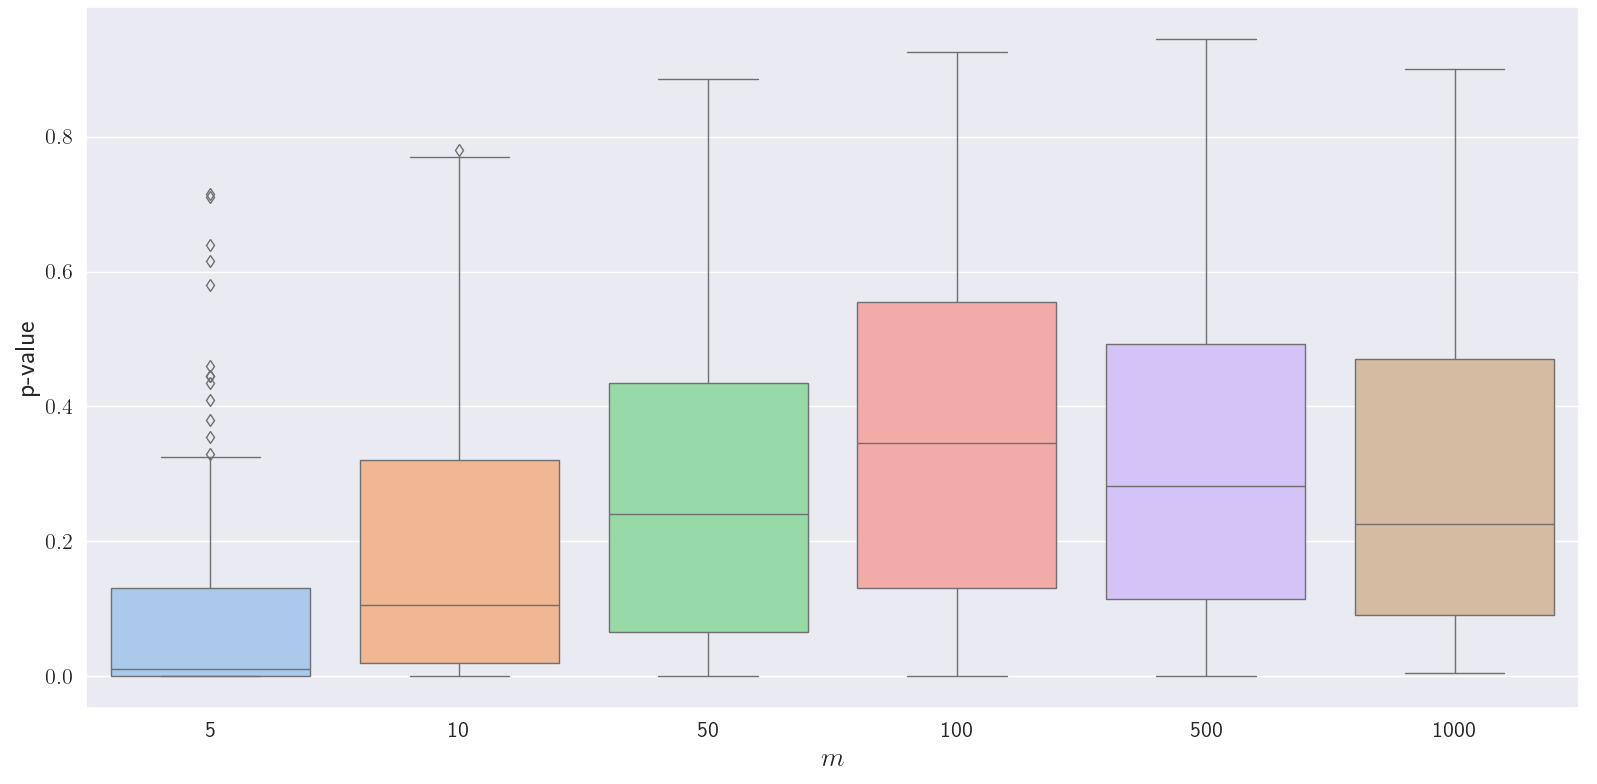

From about $m = 50$, the null hypothesis would rarely be rejected, given a reasonable choice of test level. It is possible to notice, that the p-values do not have a uniform distribution, even for a large number of random features. This subtle effect is caused by over-smoothing due to the regularisation approach taken in, which would not otherwise have been detected

## Conclusion



Construction of the RKHS-based Stein discrepancy and associated statistical test

Experimental illustrations on synthetic examples:
   	student’s t vs normal
   	statistical model criticism
   	convergence in nonparametric density estimation.